In [37]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from yellowbrick.model_selection import validation_curve 
# first KNN results
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


# Data Cleaning

In [38]:
data = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Studen prformace engineering/DATA (1).csv')
column_labels = [
    "Student Age",
    "Sex",
    "Graduated high-school type",
    "Scholarship type",
    "Additional work",
    "Regular artistic or sports activity",
    "Do you have a partner",
    "Total salary if available",
    "Transportation to the university",
    "Accommodation type in Cyprus",
    "Mothers' education",
    "Fathers' education",
    "Number of sisters/brothers",
    "Parental status",
    "Mothers' occupation",
    "Fathers' occupation",
    "Weekly study hours",
    "Reading frequency (non-scientific books/journals)",
    "Reading frequency (scientific books/journals)",
    "Attendance to the seminars/conferences related to the department",
    "Impact of your projects/activities on your success",
    "Attendance to classes",
    "Preparation to midterm exams 1",
    "Preparation to midterm exams 2",
    "Taking notes in classes",
    "Listening in classes",
    "Discussion improves my interest and success in the course",
    "Flip-classroom",
    "Cumulative grade point average in the last semester (/4.00)",
    "Expected Cumulative grade point average in graduation (/4.00)",
    "Course ID",
    "GRADE"
]


In [39]:
# Define a function to map grades to binary values
def map_grade(grade):
    if grade > 6:
        return 1  # Good
    else:
        return 0  # Bad

# Apply the mapping function to the GRADE column
data['GRADE'] = data['GRADE'].apply(map_grade)

# Print the updated DataFrame
print(data)

     STUDENT ID  1  2  3  4  5  6  7  8  9  ...  23  24  25  26  27  28  29  \
0      STUDENT1  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   1   2   1   
1      STUDENT2  2  2  3  3  1  2  2  1  1  ...   1   1   3   2   3   2   2   
2      STUDENT3  2  2  2  3  2  2  2  2  4  ...   1   1   2   2   1   1   2   
3      STUDENT4  1  1  1  3  1  2  1  2  1  ...   1   2   3   2   2   1   3   
4      STUDENT5  2  2  1  3  2  2  1  3  1  ...   2   1   2   2   2   1   2   
..          ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
140  STUDENT141  2  1  2  3  1  1  2  1  1  ...   1   1   2   1   2   1   3   
141  STUDENT142  1  1  2  4  2  2  2  1  4  ...   1   1   3   2   2   1   5   
142  STUDENT143  1  1  1  4  2  2  2  1  1  ...   1   1   3   3   2   1   4   
143  STUDENT144  2  1  2  4  1  1  1  5  2  ...   2   1   2   1   2   1   5   
144  STUDENT145  1  1  1  5  2  2  2  3  1  ...   2   1   3   2   3   1   5   

     30  COURSE ID  GRADE  
0     1          1     

In [40]:
# Assuming you have a dataframe df with a 'GRADE' column
threshold = 6
classifieddata = data
#classifieddata['GRADE'] = classifieddata['GRADE'].apply(lambda x: 'good' if x > threshold else 'bad')
classifieddata

classifieddata= classifieddata.drop('STUDENT ID', axis=1)
classifieddata.columns  = column_labels

# Algorithm

In [41]:
X = classifieddata.drop('GRADE', axis=1)
y = classifieddata['GRADE']
print(X.shape)
print(y.shape)

(145, 31)
(145,)


In [42]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)
print(x_train.shape)
print(x_test.shape)



(108, 31)
(37, 31)


In [43]:
# It's often a good idea to scale features for k-NN. 
# This ensures that all features contribute equally to the distance computation.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [44]:


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier()  # You can choose the value of k

# Train the model on the training data
knn.fit(x_train, y_train)





KNeighborsClassifier()

In [45]:
# Make predictions on the test data
#y_test = knn.predict(x_test)
# Make predictions on the test data
y_pred = knn.predict(x_test)


In [46]:


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8648648648648649


In [47]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.00      0.00      0.00         4

    accuracy                           0.86        37
   macro avg       0.44      0.48      0.46        37
weighted avg       0.79      0.86      0.83        37



# K


# Learning Curve


In [73]:
train_sizes, train_scores, test_scores = learning_curve(knn, x_train, y_train, cv = 5, n_jobs = 5, train_sizes = np.linspace(0.1, 1.0, 10) , scoring = 'f1_macro')

In [74]:

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print(train_scores_mean)
print(train_scores_std) 
print(test_scores_mean) 
print(test_scores_std)

[0.57333333 0.575      0.4790762  0.56526039 0.54877773 0.52893884
 0.60198185 0.67807446 0.7211676  0.6620537 ]
[0.21333333 0.2125     0.00686646 0.11537289 0.09750419 0.07164126
 0.06772877 0.03831891 0.05448854 0.03858456]
[0.46804878 0.46804878 0.46804878 0.46536585 0.46536585 0.46536585
 0.53715134 0.53715134 0.53715134 0.53715134]
[0.00567565 0.00567565 0.00567565 0.00926669 0.00926669 0.00926669
 0.14175177 0.14175177 0.14175177 0.14175177]


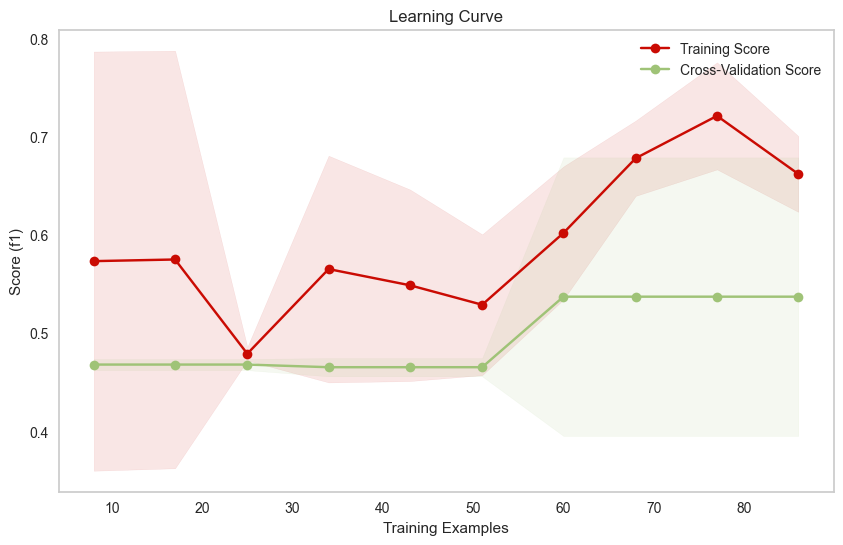

In [76]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (f1)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

# Validation curve for k neigbors classifer


In [77]:
train_sizes, train_scores, test_scores = learning_curve(knn, x_train, y_train, cv =10, n_jobs = -1, train_sizes =  np.linspace(0.1, 1.0, 10), scoring = 'f1_macro')

/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 86, in 

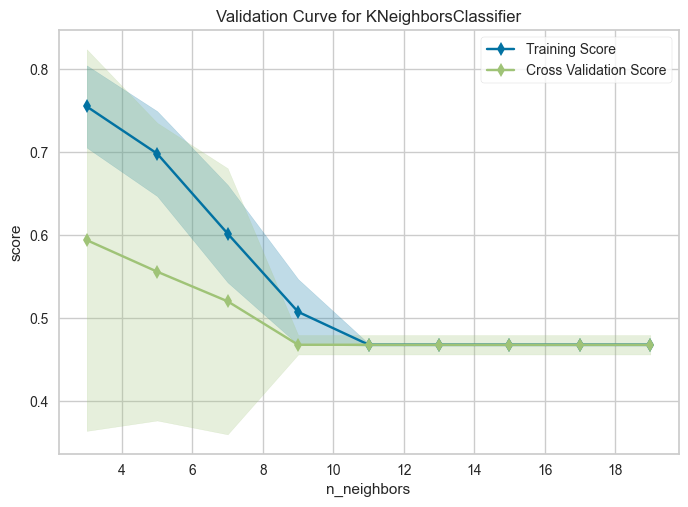

<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve

param_range = np.arange(3, 20, 2)

oz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=param_range, cv=10, scoring="f1_macro", n_jobs= -1,
)

# Using the same game dataset as in the SVC example
oz.fit(x_train, y_train)
oz.show()

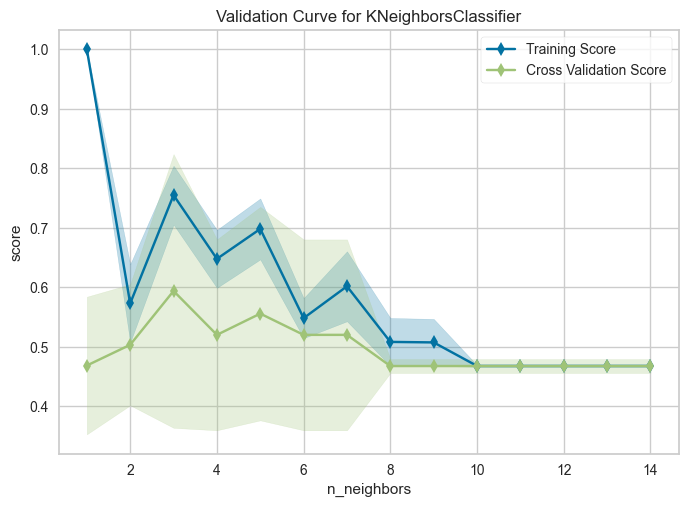

ValidationCurve(ax=<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>,
                cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
                param_name='n_neighbors',
                param_range=array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                scoring='f1_macro')


In [86]:
print(validation_curve(knn, x_train, y_train, param_name="n_neighbors", n_jobs=-1,
      param_range=np.arange(1, 15), cv=10, scoring="f1_macro"))

# GridSearch

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 10, 12],       # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme ('uniform' or 'distance')
    'p': [1, 2]                         # Distance metric (1 for Manhattan, 2 for Euclidean)
}


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_
grid_results = grid_search.cv_results_

print(best_params)
print(best_knn)
print(grid_results)
y_pred = best_knn.predict(x_test)

{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier()
{'mean_fit_time': array([0.00113382, 0.00082164, 0.00095868, 0.00072041, 0.00080585,
       0.00089402, 0.0009232 , 0.00073776, 0.00075884, 0.00069761,
       0.00066686, 0.00084968, 0.00058026, 0.00046773, 0.0004446 ,
       0.00045018, 0.00046124, 0.00044088, 0.00062838, 0.00050879,
       0.00046296, 0.00048032, 0.00045505, 0.00045667]), 'std_fit_time': array([5.83442183e-04, 1.35962187e-04, 1.25435819e-04, 6.83676407e-05,
       1.04927689e-04, 8.47579088e-05, 3.25920950e-04, 1.00514581e-04,
       7.03903389e-05, 9.08242739e-05, 4.89410105e-05, 4.79038294e-04,
       9.58643603e-05, 2.23001807e-05, 1.63655903e-05, 4.58087409e-05,
       2.73617289e-05, 5.20692203e-06, 2.04286332e-04, 5.41431743e-05,
       2.23505942e-05, 3.84818518e-05, 1.68753203e-05, 2.30562477e-05]), 'mean_score_time': array([0.00138402, 0.0027513 , 0.0022788 , 0.00175037, 0.00148573,
       0.00207229, 0.0017283 , 0.00156212, 0.00131059, 

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.00      0.00      0.00         4

    accuracy                           0.86        37
   macro avg       0.44      0.48      0.46        37
weighted avg       0.79      0.86      0.83        37



# After Optimization

In [99]:


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)  # You can choose the value of k

# Train the model on the training data
knn.fit(x_train, y_train)





KNeighborsClassifier(n_neighbors=10)

In [100]:
# Make predictions on the test data
#y_test = knn.predict(x_test)
# Make predictions on the test data
y_pred = knn.predict(x_test)


In [101]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       0.00      0.00      0.00         4

    accuracy                           0.89        37
   macro avg       0.45      0.50      0.47        37
weighted avg       0.80      0.89      0.84        37



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Adult Dataset

## Preprocessing


In [2]:
X2_train = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/X2_Train.csv')
X2_test = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/X2_Test.csv')
y2_train = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/y2_Train.csv')    
y2_test = pd.read_csv('/Users/sehaj/Documents/GitHub/Machine-Learning/Extra Data/Final_Adult/y2_Test.csv')

In [3]:
X2_train = X2_train.drop('Unnamed: 0', axis=1)
X2_test = X2_test.drop('Unnamed: 0', axis=1)
y2_train = y2_train.drop('Unnamed: 0', axis=1)
y2_test = y2_test.drop('Unnamed: 0', axis=1)
X2_train = X2_train.drop('Unnamed: 0.1', axis=1)
X2_test = X2_test.drop('Unnamed: 0.1', axis=1)



In [4]:
#X_train, X_test, y_train, y_test = train_test_split(classifieddata, column_labels, test_size=0.2, random_state=42)
# Standardize features using StandardScaler
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [60]:
y2_train_new = y2_train.values.reshape(-1)

## Algorithms #### F1 

In [51]:


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn2 = KNeighborsClassifier()  # You can choose the value of k

# Train the model on the training data
knn2.fit(X2_train_scaled, y2_train_new)



# Make predictions on the test data
#y_test = knn.predict(x_test)
# Make predictions on the test data
y_pred = knn2.predict(X2_test_scaled)



# Calculate the accuracy
accuracy = accuracy_score(y2_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8282660770222959


In [53]:

print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     12435
           1       0.66      0.57      0.61      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.74      0.75     16281
weighted avg       0.82      0.83      0.82     16281



In [54]:



scores = cross_val_score(knn2, X2_train_scaled, y2_train_new, scoring="f1_macro", cv=10)
scores.mean()

0.7567819564208433

## Learning Curve


### Learning Curve (accuracy)

In [56]:
train_sizes, train_scores, test_scores = learning_curve(knn2, X2_train_scaled, y2_train_new, cv = 5, n_jobs = 5, train_sizes = np.linspace(0.1, 1.0, 10) , scoring = 'accuracy')

KeyboardInterrupt: 

In [ ]:

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print(train_scores_mean)
print(train_scores_std) 
print(test_scores_mean) 
print(test_scores_std)

[0.8046851  0.82088693 0.82690044 0.82698915 0.82960688 0.83164832
 0.8314375  0.83261349 0.83393764 0.83405252]
[0.00491551 0.0007679  0.00105407 0.00160327 0.00168247 0.00066251
 0.00139683 0.00080416 0.00084714 0.0012    ]
[0.7652713  0.76653042 0.76665331 0.77208947 0.77178226 0.77387056
 0.77365571 0.77623538 0.77442339 0.77663464]
[0.00196935 0.00316069 0.00252674 0.00332851 0.00255716 0.00311309
 0.00390605 0.00198807 0.00260929 0.00163631]


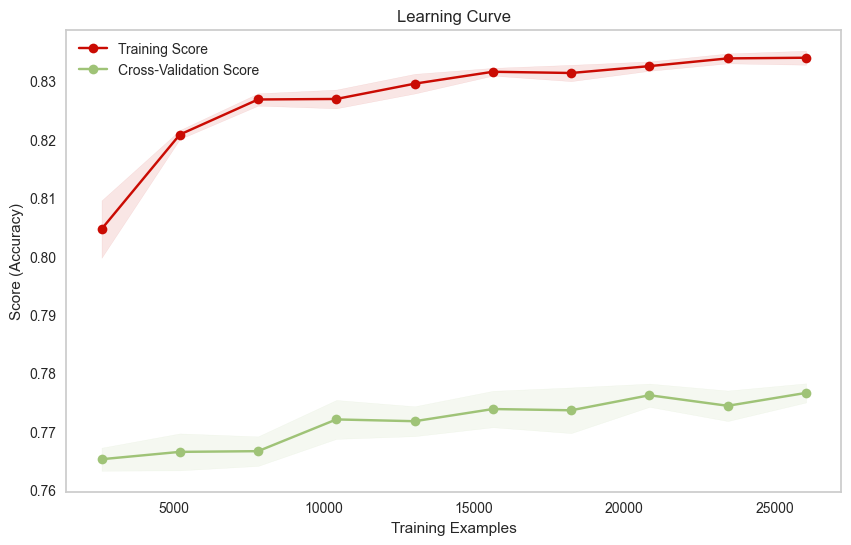

In [ ]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (Accuracy)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

### Learning curve (f1 macro)

In [57]:
train_sizes, train_scores, test_scores = learning_curve(knn, X2_train_scaled, y2_train_new, cv =10, n_jobs = -1, train_sizes =  np.linspace(0.1, 1.0, 10), scoring = 'f1_macro')

In [58]:
# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

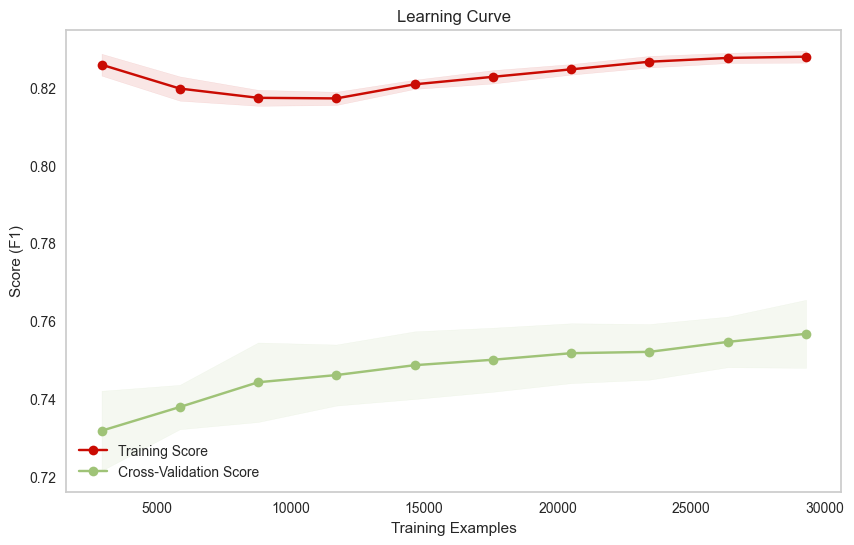

In [62]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (F1)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()

# 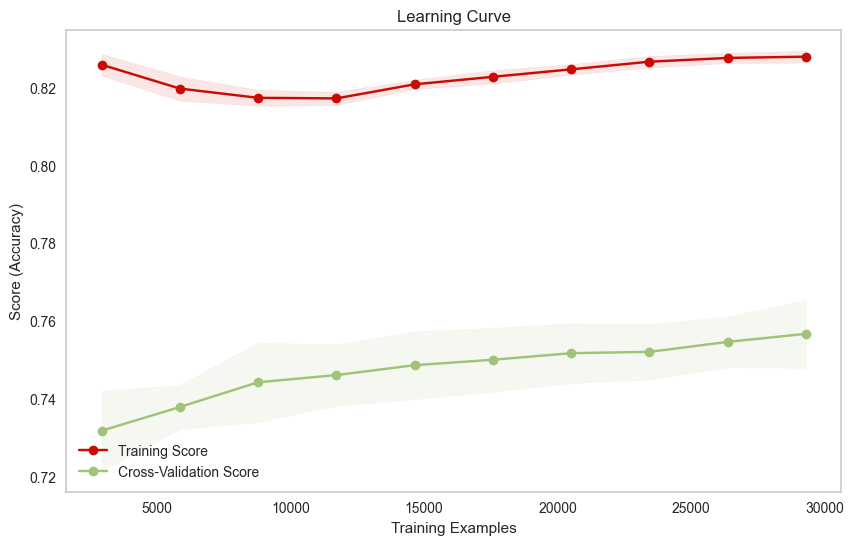

# Validation curve for k neighbors classifer


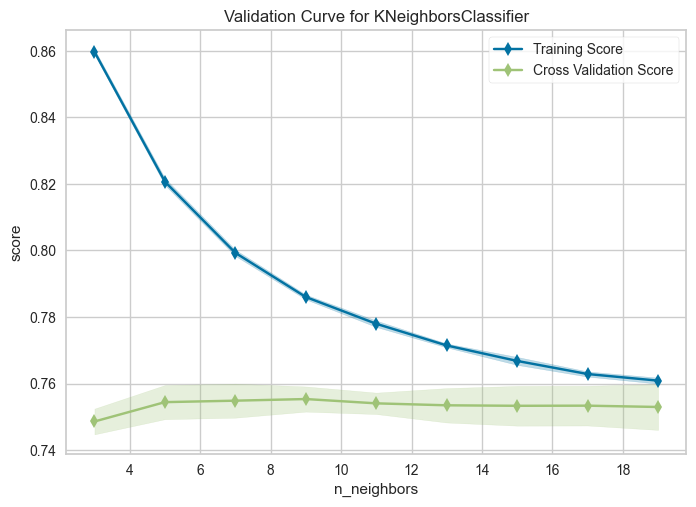

<Axes: title={'center': 'Validation Curve for KNeighborsClassifier'}, xlabel='n_neighbors', ylabel='score'>

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve

param_range = np.arange(3, 20, 2)

oz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=param_range, cv=13, scoring="f1_weighted", n_jobs= 10,
)

# Using the same game dataset as in the SVC example
oz.fit(X2_train, y2_train_new)
oz.show()

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 10, 12],       # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme ('uniform' or 'distance')
    'p': [1, 2]                         # Distance metric (1 for Manhattan, 2 for Euclidean)
}


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X2_train_scaled, y2_train_new)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_
grid_results = grid_search.cv_results_

print(best_params)
print(best_knn)
print(grid_results)
y_pred = best_knn.predict(X2_test_scaled)

{'n_neighbors': 12, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=12, p=1)
{'mean_fit_time': array([0.01988678, 0.01787219, 0.01750317, 0.01675282, 0.01694303,
       0.01664257, 0.01772237, 0.01714845, 0.0171    , 0.01700892,
       0.01746497, 0.01729159, 0.01786938, 0.01770334, 0.01673012,
       0.0164494 , 0.01839037, 0.02098155, 0.01943893, 0.01719899,
       0.01740489, 0.01827278, 0.0173058 , 0.01686177]), 'std_fit_time': array([0.00415076, 0.00177932, 0.00097153, 0.00038436, 0.00027529,
       0.00021745, 0.00048152, 0.00032314, 0.0002879 , 0.00049744,
       0.00035177, 0.00082878, 0.00121661, 0.00134137, 0.00038199,
       0.00053958, 0.00162431, 0.00300768, 0.00275612, 0.00060522,
       0.0020276 , 0.00185325, 0.0010445 , 0.00062817]), 'mean_score_time': array([ 2.21346684,  1.9159791 ,  1.69693127,  1.48165255,  2.3103919 ,
        2.08593369,  1.88053422,  1.6888658 ,  2.46615353,  2.26280999,
        2.01300583,  1.76800261,  2.5800056 ,  2.34934325,  2

In [112]:
print(classification_report(y2_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     12435
           1       0.71      0.53      0.60      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.73      0.75     16281
weighted avg       0.83      0.84      0.83     16281



# Learning Curve After Optimization


In [113]:
knn2=KNeighborsClassifier(n_neighbors=12, p=1)



train_sizes, train_scores, test_scores = learning_curve(knn2, X2_train_scaled, y2_train_new, cv =10, n_jobs = -1, train_sizes =  np.linspace(0.1, 1.0, 10), scoring = 'f1_macro')

In [114]:
# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

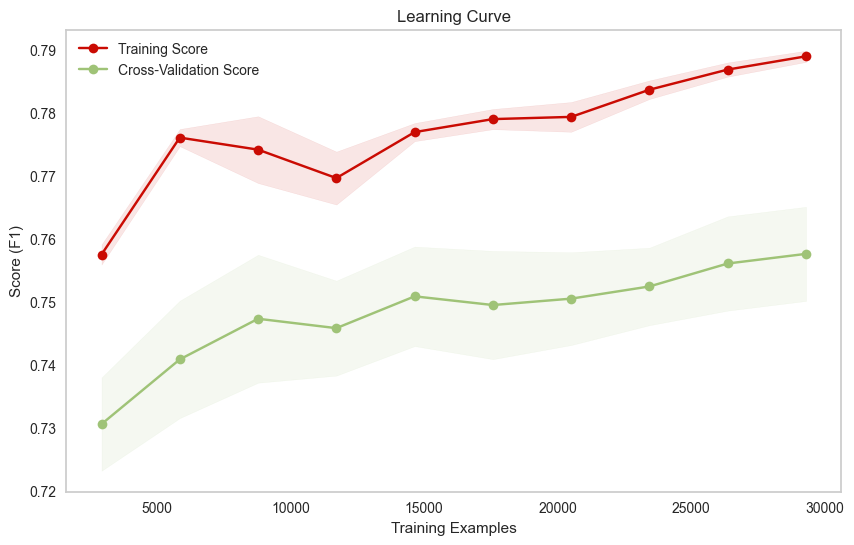

In [115]:
# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score (F1)")
# Plot the mean training and test scores
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add a legend
plt.legend(loc="best")

# Show the plot
plt.show()